# Introduction & Session Goal 

In this session, we will walk through a live coding session on supervised machine learning algorithms in practice using UCI Credit Card Default dataset. 

The goal is to build an automated model for both identifying the key factors, and predicting a credit card default based on the information about the client and historical transactions. The general concepts of the supervised machine learning are later discussed, together with a detailed explanation of all techniques and algorithms used to build the models. 


## About credit card default prediction 

Financial institutions need to measure risks within their credit portfolios for regulatory requirements and for internal risk management. To meet these requirements financial institutions increasingly rely on models and algorithms to predict losses resulting from customers' defaults. Hence, developing sufficiently accurate and robust models is one of the major efforts of quantitative risk management groups within these institutions.

In this project, our job is to reliably predict who is likely to default. If so, the bank may be able to prevent the loss by providing the customer with alternative options (such as forbearance or debt consolidation, etc.). Hence, we build an automated model based on the information about the client and historical transactions, capable of identifying key factors and predicting a credit card default.


## Dataset Description 

We will use the credit card default dataset from the UCI Machine Learning Repository. Some key features about the dataset are as follows:
-  24,000 observations made by a bank in Taiwan on distinct credit card holders from April 2005 to September 2005. (./data/raw/data.csv) 
- binary variable default.payment.next.month as response variable.  It indicates whether or not the credit card holders are defaulters next month (Yes = 1, No = 0)
- 23 features are available to predict the response variable. 

- Client personal information:
1. `LIMIT_BAL`: Amount of given credit (in New Taiwan dollars): it includes both the individual consumer credit and his/her family (supplementary) credit.
2. `SEX`: 1 = male; 2 = female.
3. `EDUCATION`: 1 = graduate school; 2 = university; 3 = high school; 4 = others.
4. `MARRIAGE`: Marital status, 1 = married; 2 = single; 3 = others.
5. `AGE`: Age in years.

- History of past payments from April to September 2005, i.e., the delay of the past payment referred to a specific month: 6. `PAY_0`: Repayment status in September, 2005. 7. `PAY_2`: Repayment status in August, 200; ...; `PAY_6`: Repayment status in April, 2005.

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

- Amount of bill statement (in New Taiwan dollars), i.e. a monthly report that credit card companies issue to credit card holders in a specific month: 12. e.g., `BILL_AMT1`: Amount of bill statement in September, 2005. 13. `BILL_AMT2`: Amount of bill statement in August, 2005 ; ...; 17. `BILL_AMT6`: Amount of bill statement in April, 2005.
- Amount of previous payment (in New Taiwan dollars): 18. e.g., `PAY_AMT1`: Amount of previous payment in September, 2005;...; 23. `PAY_AMT6`: Amount of previous payment in April, 2005.


Now, let's load the data and inspect the first few observations.

In [18]:
# Import relevant libraries 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 

# Set working directory to project root
os.chdir('C:/Users/j.tang/ml-coding-tutorial/credit-card-default-tutorial/')

data = pd.read_csv('C:/Users/j.tang/ml-coding-tutorial/credit-card-default-tutorial/data/raw/data.csv')
# rename columns
data.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
data.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
data.rename(columns=lambda x: x.upper(), inplace=True)
data.head()


,UNNAMED: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,6,50000,1,1,2,37,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [13]:
# Let's check for more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   UNNAMED: 0  24000 non-null  int64
 1   ID          24000 non-null  int64
 2   LIMIT_BAL   24000 non-null  int64
 3   SEX         24000 non-null  int64
 4   EDUCATION   24000 non-null  int64
 5   MARRIAGE    24000 non-null  int64
 6   AGE         24000 non-null  int64
 7   PAY_1       24000 non-null  int64
 8   PAY_2       24000 non-null  int64
 9   PAY_3       24000 non-null  int64
 10  PAY_4       24000 non-null  int64
 11  PAY_5       24000 non-null  int64
 12  PAY_6       24000 non-null  int64
 13  BILL_AMT1   24000 non-null  int64
 14  BILL_AMT2   24000 non-null  int64
 15  BILL_AMT3   24000 non-null  int64
 16  BILL_AMT4   24000 non-null  int64
 17  BILL_AMT5   24000 non-null  int64
 18  BILL_AMT6   24000 non-null  int64
 19  PAY_AMT1    24000 non-null  int64
 20  PAY_AMT2    24000 non-null  

# Data inspection and exploration 

One of the first steps in any data analysis or machine learning project is to understand the data. 
There are several key questions to ask:

1. What is the overall structure of the data?
2. What is the distribution of the features? - Are there any outliers?
3. What is the distribution of the target variable?





,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,166952.236667,1.604708,1.853250,1.550792,35.488000
std,129743.172524,0.488923,0.784372,0.522030,9.240581
min,10000.000000,1.000000,0.000000,0.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,800000.000000,2.000000,6.000000,3.000000,75.000000


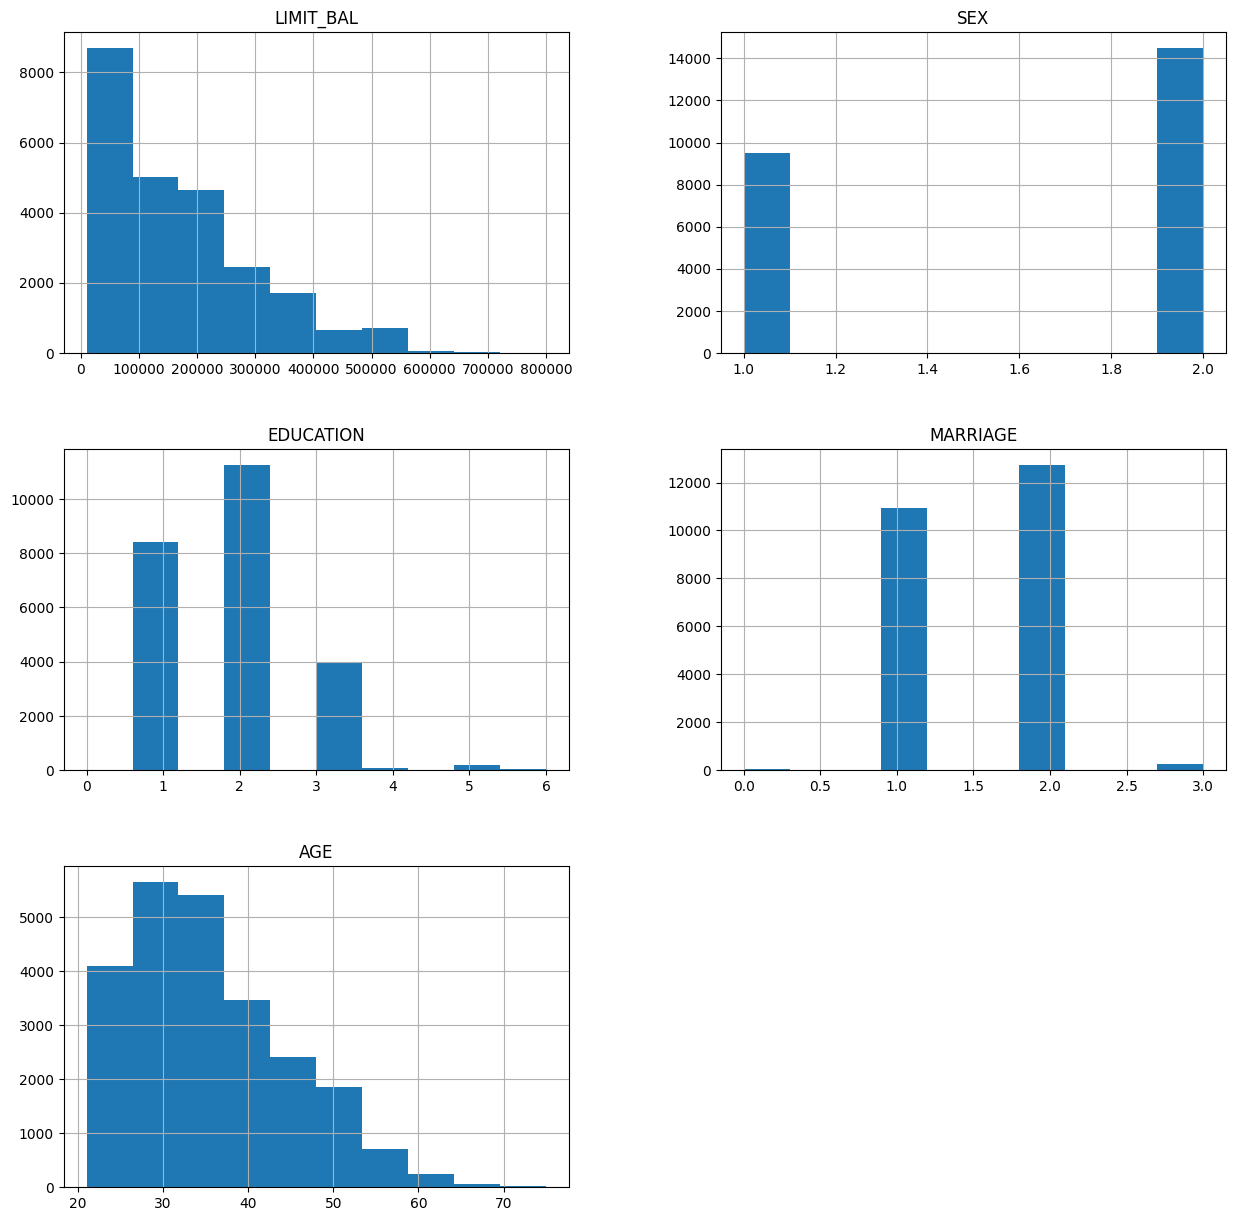

In [8]:
# Let's start by checking the distribution of the client personal information
fig = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].hist(figsize=(15, 15))
plt.savefig('./reports/personal_info_distributions.png')
data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

# What can you tell from the plots and the summary statistics?

# LIMIT_BAL, SEX, AGE seem to be consistent with the description 
# While education and marriage seem to have outliers with undocumented values
# Why do we have education above 4? 



In [5]:
# Let's inspect a bit further on education and marriage

print(data['EDUCATION'].value_counts().sort_index())
print(data['MARRIAGE'].value_counts().sort_index())

EDUCATION
0       11
1     8423
2    11267
3     3959
4       94
5      208
6       38
Name: count, dtype: int64
MARRIAGE
0       43
1    10953
2    12746
3      258
Name: count, dtype: int64


In [10]:

# remove useless and incorrect information
print(f"Dataset size before:\t{data.shape[0]}")
# Filter education 
filtered_data = data.query('EDUCATION != 0 & EDUCATION <= 5')
# Filter for marriage 
filtered_data = data.query('MARRIAGE != 0') 
print(f"Dataset size after:\t{filtered_data.shape[0]}")
# let's save to the interim folder 
filtered_data.to_csv('./data/processed/filtered_data.csv')

Dataset size before:	24000
Dataset size after:	23957


In [ ]:
# Can you spot any other anomalises in the data set e.g., with Pay and Bill? 
# TODO: Check anomalise in PAY and BILL 

Now let's inspect our target variables 
In this section we show some graphs to better understand the relationship between the features and the target DEFAULT.



In [15]:
print(data['DEFAULT'].value_counts())
print(data['DEFAULT'].value_counts(normalize=True))


DEFAULT
0    18682
1     5318
Name: count, dtype: int64
DEFAULT
0    0.778417
1    0.221583
Name: proportion, dtype: float64


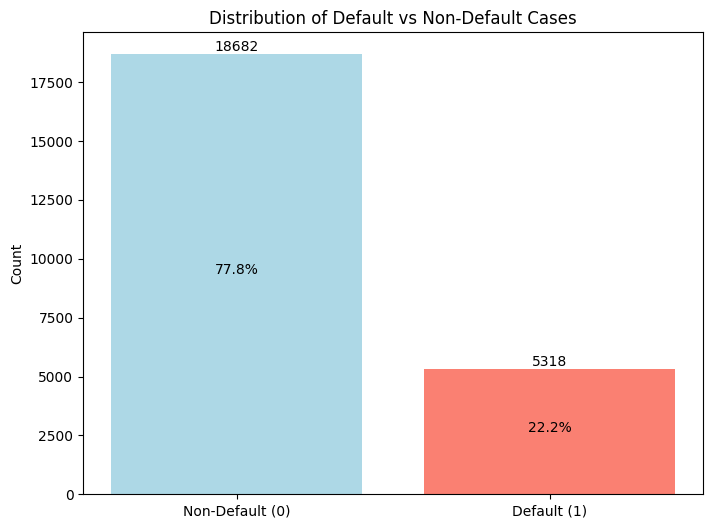

<Figure size 640x480 with 0 Axes>

In [22]:
# Let's visualize it better

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Non-Default (0)', 'Default (1)'], data['DEFAULT'].value_counts(), color=['lightblue', 'salmon'])
plt.title('Distribution of Default vs Non-Default Cases')
plt.ylabel('Count')
plt.text(0, data['DEFAULT'].value_counts()[0], f'{data["DEFAULT"].value_counts()[0]}', ha='center', va='bottom')
plt.text(1, data['DEFAULT'].value_counts()[1], f'{data["DEFAULT"].value_counts()[1]}', ha='center', va='bottom')

# Add percentage labels
plt.text(0, data['DEFAULT'].value_counts()[0]/2, f'{data["DEFAULT"].value_counts(normalize=True)[0]:.1%}', ha='center')
plt.text(1, data['DEFAULT'].value_counts()[1]/2, f'{data["DEFAULT"].value_counts(normalize=True)[1]:.1%}', ha='center')

plt.show()
plt.savefig('./reports/default_distribution.png')


First, we see that the dataset we are dealing with is quite unbalanced, with only 5,318 defaulters (22.1% of the total number). This is a rather relevant problem that needs to be addressed. If neglected, classification models will tend to focus on the majority class and overlook the minority class

What does it means?? 

-  In our case, we could achieve almost accuracy by just predicting the majority class (non-defaulters) for all examples, without the help of a supervised machine learning algorithm. Thus, when we will fit classifiers on our datasets, it would make sense to focus on other metrics than accuracy when comparing different models.
- Also the sample size is quite limited, how can we design the experiment/model that's fair and robust?  
- Can we access the underlying distribution between defaulters / non-defaulters

In [29]:
# Let's test the distributions of age and LIMIT_BAL between defaulters and non-defaulters

# H0 (Null Hypothesis): There is no significant difference in the age distribution between defaulters and non-defaulters
# H1 (Alternative Hypothesis): There is a significant difference in the age distribution between defaulters and non-defaulters

# Similarly for credit limit:
# H0: There is no significant difference in the credit limit distribution between defaulters and non-defaulters
# H1: There is a significant difference in the credit limit distribution between defaulters and non-defaulters

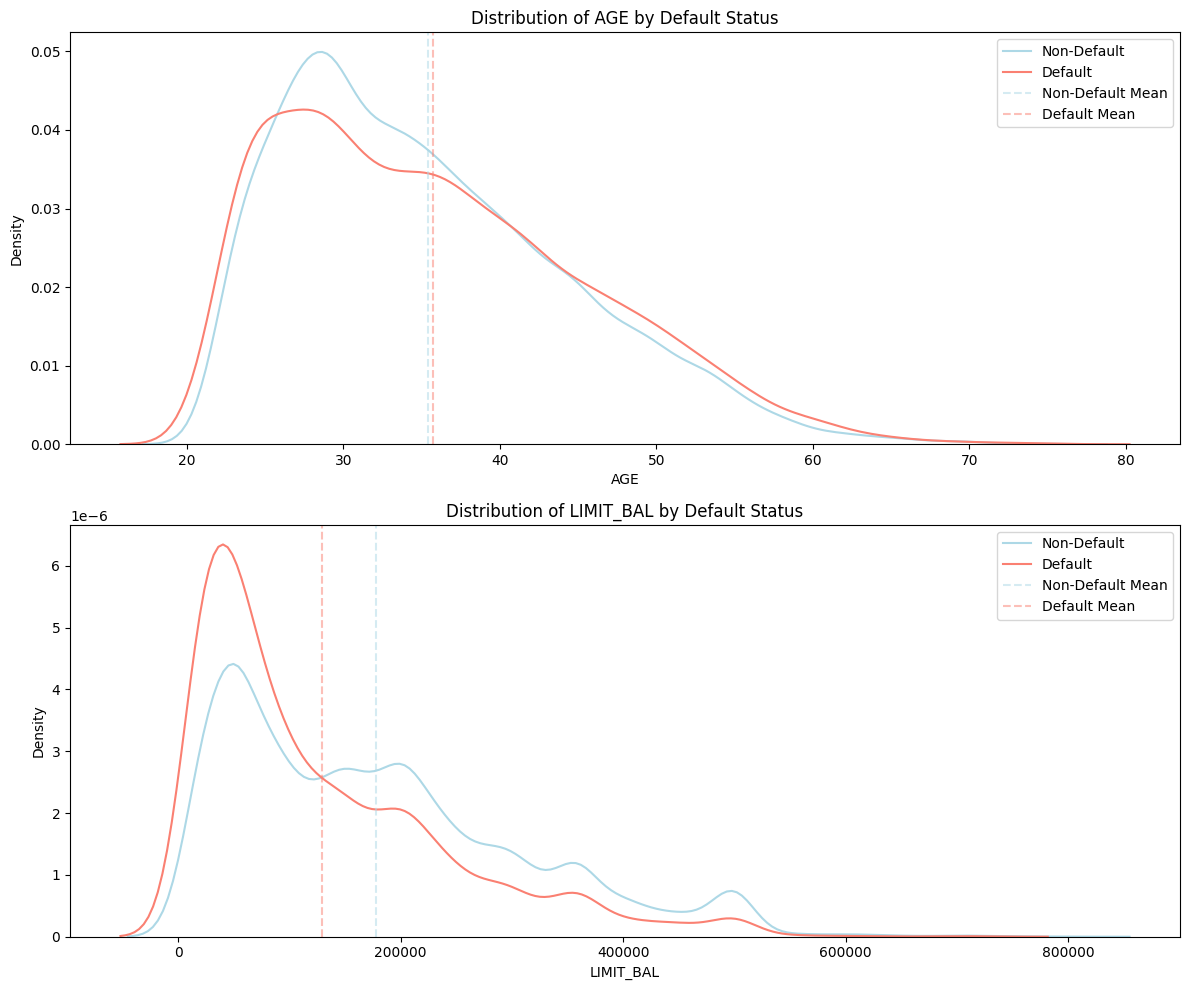

In [28]:
# Let's test the distributions of age and LIMIT_BAL between defaulters and non-defaulters
# Create a function to plot distribution comparisons
import seaborn as sns 
def plot_distributions(data, numerical_cols):
    n_cols = len(numerical_cols)
    fig, axes = plt.subplots(n_cols, 1, figsize=(12, 5*n_cols))
    
    if n_cols == 1:
        axes = [axes]
    
    for ax, col in zip(axes, numerical_cols):
        # Plot density for defaulters and non-defaulters
        sns.kdeplot(data=data[data['DEFAULT'] == 0], x=col, 
                   label='Non-Default', ax=ax, color='lightblue')
        sns.kdeplot(data=data[data['DEFAULT'] == 1], x=col,
                   label='Default', ax=ax, color='salmon')
        # Add mean lines
        ax.axvline(data[data['DEFAULT'] == 0][col].mean(), color='lightblue', 
                  linestyle='--', alpha=0.5, label='Non-Default Mean')
        ax.axvline(data[data['DEFAULT'] == 1][col].mean(), color='salmon',
                  linestyle='--', alpha=0.5, label='Default Mean')
        
        # Add labels and title
        ax.set_xlabel(col)
        ax.set_ylabel('Density')
        ax.set_title(f'Distribution of {col} by Default Status')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

# Plot distributions for AGE and LIMIT_BAL
numerical_columns = ['AGE', 'LIMIT_BAL']
plot_distributions(data, numerical_columns)



In [25]:

from scipy import stats
# Separate defaulters and non-defaulters
defaulters_age = data[data['DEFAULT'] == 1]['AGE']
non_defaulters_age = data[data['DEFAULT'] == 0]['AGE']

defaulters_limit = data[data['DEFAULT'] == 1]['LIMIT_BAL'] 
non_defaulters_limit = data[data['DEFAULT'] == 0]['LIMIT_BAL']

# Perform KS test - ks is less senstive to the variance 
ks_stat_age, p_value_age = stats.ks_2samp(defaulters_age, non_defaulters_age)
ks_stat_limit, p_value_limit = stats.ks_2samp(defaulters_limit, non_defaulters_limit)

# Perform t-test - test between the mean 
t_stat_age, t_p_value_age = stats.ttest_ind(defaulters_age, non_defaulters_age)
t_stat_limit, t_p_value_limit = stats.ttest_ind(defaulters_limit, non_defaulters_limit)

print("Kolmogorov-Smirnov test results:")
print(f"AGE - statistic: {ks_stat_age:.4f}, p-value: {p_value_age:.4e}")
print(f"LIMIT_BAL - statistic: {ks_stat_limit:.4f}, p-value: {p_value_limit:.4e}")

print("\nt-test results:")
print(f"AGE - statistic: {t_stat_age:.4f}, p-value: {t_p_value_age:.4e}")
print(f"LIMIT_BAL - statistic: {t_stat_limit:.4f}, p-value: {t_p_value_limit:.4e}")

Kolmogorov-Smirnov test results:
AGE - statistic: 0.0373, p-value: 1.9558e-05
LIMIT_BAL - statistic: 0.1836, p-value: 1.4903e-122

t-test results:
AGE - statistic: 2.3177, p-value: 2.0476e-02
LIMIT_BAL - statistic: -24.4208, p-value: 3.9809e-130


 
For the feature LIMIT_BAL, we draw a density map according to the default type. It seems that when the given credit amount is approximately below 200,000, the probability of default is greater than that of non-default. This suggests that those with lower credit limits are more likely to default, whereas those with higher credit limits are less likely to default. This observation makes sense as a higher credit limit is given to people with higher creditworthiness that have a lower likelihood to default. Also we can see from the test above that there is a statistical difference in terms of the distribution of age / credit limit, with both KS and t-tests showing highly significant p-values (p < 0.001).
 
What it means for modelling / analytics:
 - LIMIT_BAL appears to be a strong predictor for default risk and should be included in our models
 - We may want to consider binning or transforming LIMIT_BAL since the relationship appears non-linear
 - The clear separation between defaulters and non-defaulters suggests this feature could be valuable for risk segmentation
 - We should be mindful of potential selection bias - the relationship between credit limit and default may be partially due to banks' existing credit assessment practices
 - For age, while statistically significant, the practical difference appears smaller and may require additional feature engineering to be most useful

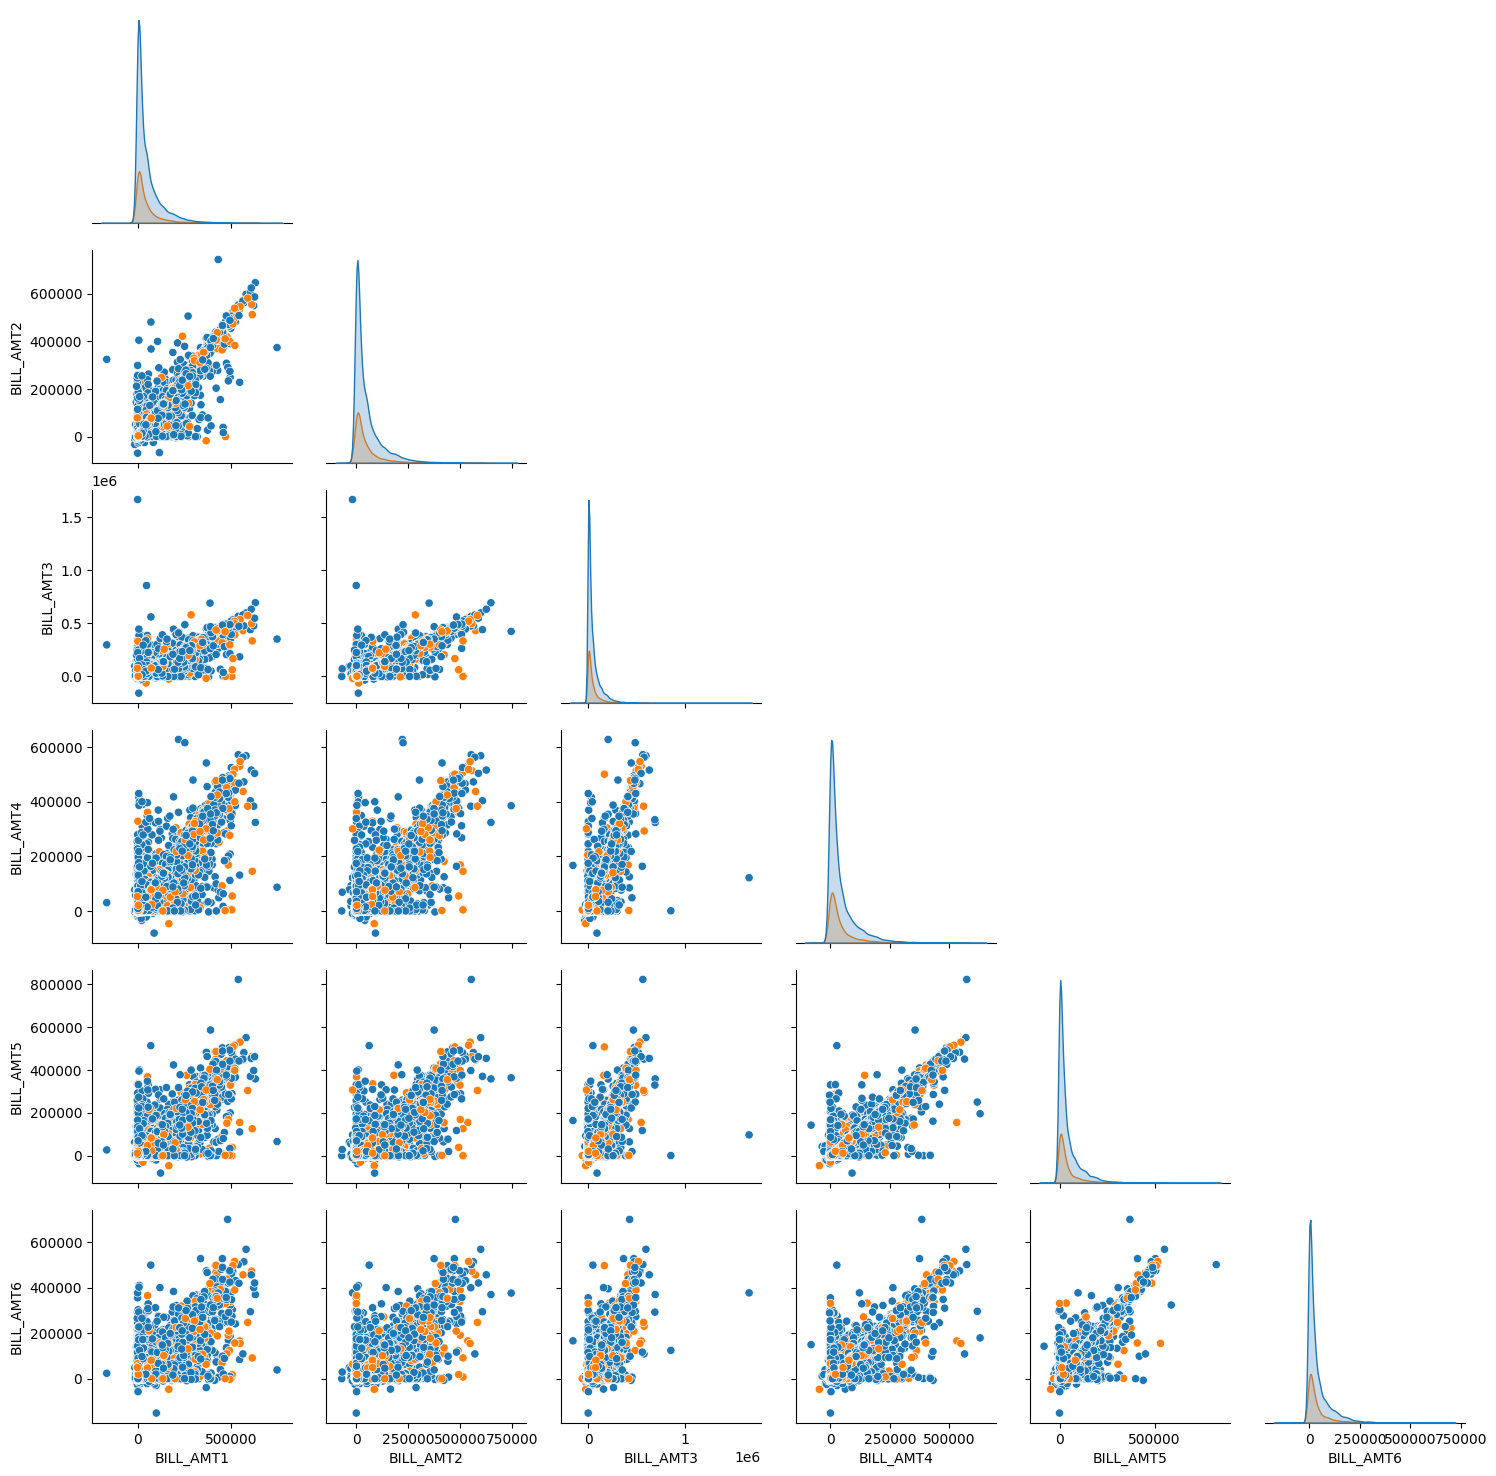

In [32]:
# We can
pair_plot = sns.pairplot(data[[
    'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','DEFAULT']], hue='DEFAULT', diag_kind='kde', corner=True)
pair_plot._legend.remove()